In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Saving the data as pandas dataframe

In [21]:
data = pd.read_csv("50_Startups.csv")

In [22]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [24]:
df = data

In [25]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


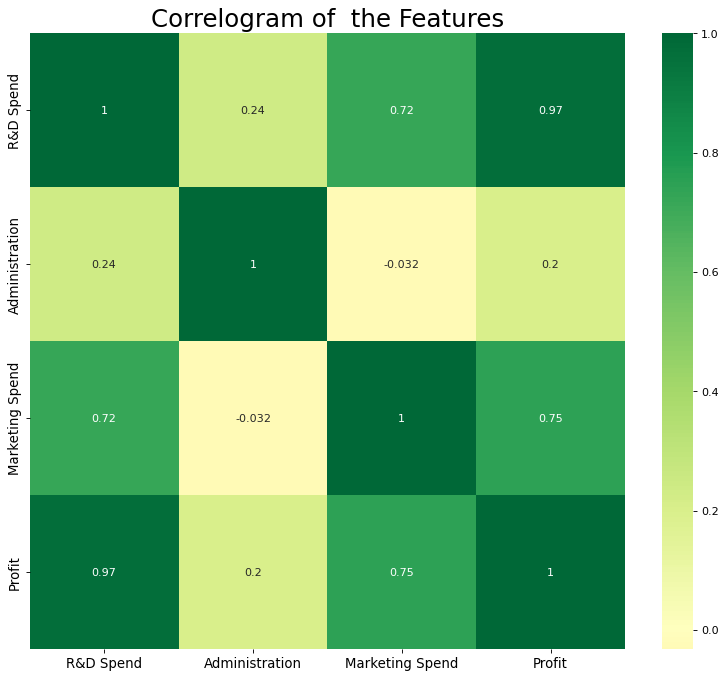

In [26]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of  the Features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [31]:
X = df.iloc[:,:-1].values
y = df.iloc[:,4]

In [36]:
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])
onehot_encoder = OneHotEncoder(categorical_features=[3])
X = onehot_encoder.fit_transform(X).toarray()

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

# Spliting the data set to train and test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25,random_state=0)

# Model Selection

In [12]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

# model prediction

In [13]:
y_pred = regression_model.predict(X_test)

# model accuracy

In [14]:
r2_score(y_test,y_pred)


0.9325447894242299

# Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
# reg = LinearRegression()
cv_results = cross_val_score(regression_model,X,y,cv=4)

In [16]:
print(cv_results)

[ 0.73766666 -0.08438037 -0.8937712   0.47223332]


In [17]:
df1 = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})
df1


,predictions,actual
28,104857.411043,103282.38
11,132192.843388,144259.40
10,133322.963019,146121.95
41,72110.673226,77798.83
2,179086.148932,191050.39
27,114829.751562,105008.31
38,65940.133356,81229.06
31,98671.390192,97483.56
22,114454.332907,110352.25
4,168407.966911,166187.94


# Applying the model to a single observation

In [18]:
test_data = [0,1,0,145789,165331,186489]
test_data_array  = np.array(test_data)
test_data_reshape = test_data_array.reshape(1,-1)
pred_test_data_single_row  = regression_model.predict(test_data_reshape)
round(float(pred_test_data_single_row),2)


ValueError: X has 6 features, but LinearRegression is expecting 4 features as input.

In [19]:
from sklearn.externals import joblib
joblib.dump(regression_model,"multipleLinearRegression.pkl")

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\seidu\anaconda3\lib\site-packages\sklearn\externals\__init__.py)